In [1]:
from scipy import *
import numpy as np
from pylab import *

In [3]:
import fieldize
nval=10000
nbin=10
ndim=2
pos, value, field = rand(nval,ndim)*(nbin-5), ones(nval), zeros(shape=(nbin+1,nbin+1))
x,y=pos.T
ifield=fieldize.cic(pos, value, field, periodic=1)

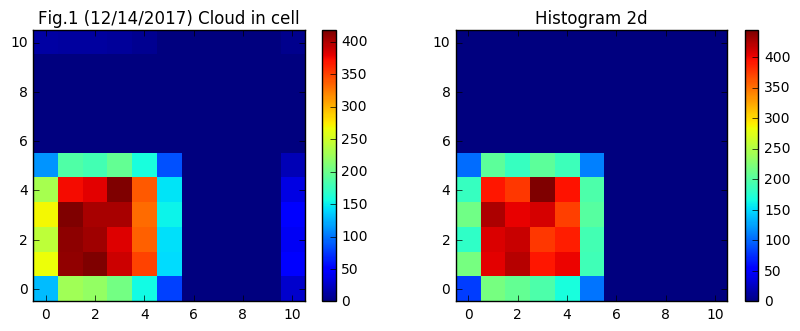

In [14]:
figure(figsize=(10,3.5))
subplot(121)
imshow(ifield,origin='lower',interpolation='nearest')
title('Fig.1 (12/14/2017) Cloud in cell')
colorbar()
subplot(122)
ihist2d=histogram2d(x,y,bins=[arange(-0.5,11),arange(-0.5,11)])[0]
imshow(ihist2d,origin='lower',interpolation='nearest')
title('Histogram 2d')
colorbar()
show()

In [17]:
nudir='/Users/jia/Documents/weaklensing/nubias/'
k512,pk512=load(nudir+'kpk_512grid.npy')
k128,pk128=load(nudir+'kpk_128grid.npy')
k256,pk256=load(nudir+'kpk_256grid.npy')

kful,pkful=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_tot_066.txt').T
knu,pknu=genfromtxt('/Users/jia/Documents/weaklensing/kspace_nu/neutrino-batch/matterpower/mnv0.10000_om0.30000_As2.1000/powerspec_nu_066.txt').T
fnu=0.1/93.14/0.3/.7**2
pkdm=(sqrt(pkful)-fnu*sqrt(pknu))**2/(1-fnu)**2
ks, ps, Ns = genfromtxt(nudir+'Pk_snapshot_066_idmod_101_0.hdf5_Ng512.txt').T

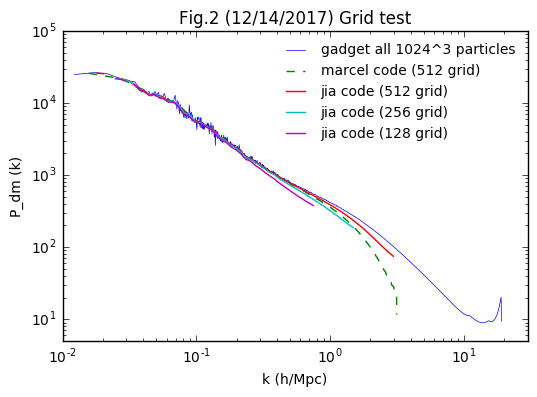

In [26]:
loglog(kful*1e3,pkdm/1e9,'-',lw=0.5, label='gadget all 1024^3 particles')
loglog(ks,ps,'--', label='marcel code (512 grid)')
loglog(k512,pk512, label='jia code (512 grid)')
loglog(k256,pk256, label='jia code (256 grid)')
loglog(k128,pk128, label='jia code (128 grid)')
legend(fontsize=10,frameon=0)
title('Fig.2 (12/14/2017) Grid test')
xlim(1e-2,30)
ylim(5,1e5)
xlabel('k (h/Mpc)')
ylabel('P_dm (k)')
show()